In [76]:

import pandas as pd

#this error:utf8 occurs for some datasets you have to put encoding=latin1 always

df=pd.read_csv('/Users/mertz/dataAnalyze/spotifyD/spotify.csv',encoding='latin-1')


In [77]:
df=df.dropna()



In [88]:
#LEARNING:When you clean and delete some rows and all do them on a seperate above cell because when you do smthng wrong and rerun whole cell these cells are changed or types are changed trying to running it again gives eerorr.

#!pip3 install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


#MANIPULATE/CLEA

#column names had to be changed.
df.columns=[col.replace('_%','') for col in df.columns]

#we checked the type of data,
#our streams variable is object which means string,change that to float/or integer


#we had a row with a specific issue we dropped that row with wrong value
problematic_row = df[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']
#df=df.drop(index=574)
#print(df.loc[574]) 



#df['streams'] = df['streams'].str.replace(',', '').astype(float) when you run again and again we get error since we dont have string anymoer its already float so commented out.


#we took features that we think affects stream count.Independent variables in other words.
#We can keep adding it or subtracting from list of ones we want.!
#depending on your models prediction later on,if it means squared and rsquared we can remove or add variables.
features=df[['bpm','danceability','valence'	,'energy','acousticness','liveness','speechiness']]


# hypothesizing that these variables have an influence on the number of streams a song receives, which is your target variable.
target=df['streams']

#In summary, test_size controls how much of your data is used for testing, and random_state ensures that the random process of splitting the data is reproducible.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.7, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [89]:
#MODEL 1  Random forestregressor

rfModel = RandomForestRegressor(n_estimators=100, random_state=42)
rfModel.fit(X_train_scaled, y_train)
predictions = rfModel.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


# Example: Predicting streams for a new song
new_song_features = [[120, 70 , 80, 60, 50,10,5]]  # example feature values i gave randomly.
new_song_features_scaled = scaler.transform(new_song_features)
predicted_streams = rfModel.predict(new_song_features_scaled)
print(f"Predicted Streams: {predicted_streams[0]}")

Mean Squared Error: 2.9760918327377875e+17
Predicted Streams: 448529973.78


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [90]:
#Linear Regression: Good for understanding relationships between variables, but might be too simple for complex relationships.

from sklearn.linear_model import LinearRegression

lRmodel = LinearRegression()
lRmodel.fit(X_train_scaled, y_train)
predictions = lRmodel.predict(X_test_scaled) 

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

new_song_features = [[120, 70 , 80, 60, 50,10,5]]  # example feature values i gave randomly.
new_song_features_scaled = scaler.transform(new_song_features)
predicted_streams = lRmodel.predict(new_song_features_scaled)
print(f"Predicted Streams: {predicted_streams[0]}")

Mean Squared Error: 2.762042945537966e+17
Predicted Streams: 482331181.7716083


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
#can try as many models possible see how mean squared errors change as well 
#https://www.databricks.com/glossary/machine-learning-models check for different models


In [91]:
#model Decision Tree Regressor: Useful for capturing non-linear relationships; can be more interpretable than some other models.
#we try different models and see how better they are based on our dataset and usecase

from sklearn.tree import DecisionTreeRegressor

dtModel = DecisionTreeRegressor(random_state=42)
dtModel.fit(X_train_scaled, y_train)
predictions=dtModel.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Example: Predicting streams for a new song
new_song_features = [[120, 70 , 80, 60, 50,10,5]]  # example feature values i gave randomly.
new_song_features_scaled = scaler.transform(new_song_features)
predicted_streams = dtModel.predict(new_song_features_scaled)
print(f"Predicted Streams: {predicted_streams[0]}")

Mean Squared Error: 7.156657165217078e+17
Predicted Streams: 160845341.0


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


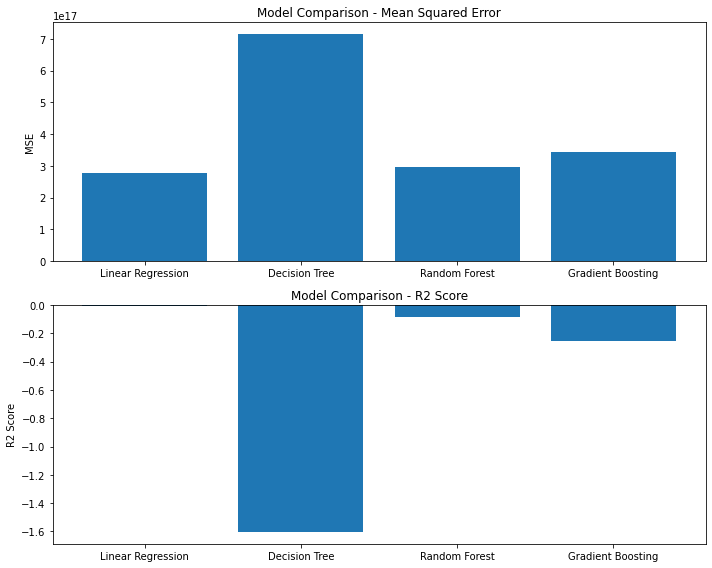

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#COMPARING MODEL ACCURACIES
#WE NEED MSE R SQUARED OR ROOT MEAN SQUARED FOR EACH MODELS

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary to store the performance metrics
model_performance = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    model_performance[name] = {"MSE": mse, "R2": r2}

# Visualization
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plotting MSE
ax[0].bar(model_performance.keys(), [performance['MSE'] for performance in model_performance.values()])
ax[0].set_title('Model Comparison - Mean Squared Error')
ax[0].set_ylabel('MSE')

# Plotting R2 Score
ax[1].bar(model_performance.keys(), [performance['R2'] for performance in model_performance.values()])
ax[1].set_title('Model Comparison - R2 Score')
ax[1].set_ylabel('R2 Score')

plt.tight_layout()
plt.show()

In [94]:
#We saved this model like this so we can call it from streamlit to use it in frontend webapp
!pip install joblib

import joblib

# Train your model
lRmodel = LinearRegression()
lRmodel.fit(X_train_scaled, y_train)

# Save your model
joblib.dump(lRmodel, 'linear_regression_model.pkl')

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


['linear_regression_model.pkl']

In [95]:

# Save the scaler and call it in streamlit too!
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
'''
LEARNING



what does bigger or smaller the r2 score or mean squared eerors meaning



The R-squared (R²) score and the Mean Squared Error (MSE) are both metrics used to evaluate the performance of regression models, but they tell you different things about the model's accuracy and fit:

R-squared (R²) Score:

What it is: R² is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in a regression model. It is a value between 0 and 1.
Interpretation:
Higher R²: A higher R² value indicates that a larger proportion of variance in the dependent variable is explained by the independent variables. In simple terms, higher R² means better model fit.
Lower R²: A lower R² value suggests that the model does not explain much of the variance in the dependent variable; it might not be capturing the underlying relationships effectively.
Caveat: A high R² does not always mean a good model. It can be artificially inflated by adding irrelevant independent variables, and it does not indicate whether the model is appropriate or whether every predictor is significant.
Mean Squared Error (MSE):

What it is: MSE is the average of the squares of the errors, i.e., the average squared difference between the estimated values and the actual value. It is always non-negative, and values closer to zero are better.
Interpretation:

Lower MSE: A lower MSE indicates that the model has a smaller difference between the predicted and actual values, implying better model performance.
Higher MSE: A higher MSE suggests a larger difference between the predicted and actual values, indicating poorer model performance.

Caveat: MSE is sensitive to outliers. Large errors have disproportionately large impacts on MSE, so a model with a few large errors may have a worse MSE than a model with many small errors.
In summary:

A good model would typically have a high R² (close to 1) and a low MSE (close to 0).
When comparing models, the one with a higher R² and a lower MSE is generally considered better in terms of prediction accuracy.
Always consider these metrics in the context of your specific data and the problem you are solving. Sometimes, a model with a slightly lower R² but better interpretability and simplicity might be preferred, depending on the use case.



'''